You've been asked to help the marketing team in increasing performance of their marketing campaign. The team wants to improve campaign targeting. In other words they want to identify customers for which the gain from being contacted is the highest. To establish a proof of concept they provided data from previous campaign for both control and targeted groups, which were selected at random from non-users before the campaign start. Aim of the campaign was to persuade customers to subscribe to the term deposit. The product (term deposit) was available also to the control group (but not marketed).

The dataset contains information about direct marketing campaign (phone calls) of a Portuguese banking institution.

__Attributes:__<br>

__Clients' data:__<br>
- __age__ (numeric)<br>
- __job:__ type of job (categorical: admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown) <br>
- __marital:__ marital status (categorical: divorced, married, single, unknown; note: divorced means divorced or widowed)<br>
- __education__ (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)<br>
- __default:__ has credit in default? (categorical: no, yes, unknown)<br>
- __housing:__ has housing loan? (categorical: no, yes, unknown)<br>
- __loan:__ has personal loan? (categorical: no, yes, unknown)<br>

__Target data:__<br>
- __test_control_flag:__ contains information if the person was part of the campaign (campaign group) or control group (control group)<br>
- __y:__ has the client subscribed a term deposit?

__Data related with the last contact of the current campaign:__<br>
- __contact:__ contact communication type (categorical: cellular, telephone)<br>
- __month:__ last contact month of year (categorical: jan, feb, mar, ... , nov, dec)<br>
- __day_of_week:__ last contact day of the week (categorical: mon,tue, wed,thu, fri)<br>
- __duration:__ last contact duration, in seconds (numeric)<br>
- __campaign:__ total number of contacts performed during this campaign and for this client (numeric, includes last contact)</br>

__Data about previous campaigns:__<br>
- __pdays:__ number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
- __previous:__ number of contacts performed before this campaign and for this client (numeric)<br>
- __poutcome:__ outcome of the previous marketing campaign (categorical: failure, nonexistent, success)<br>
- __Social and economic context attributes__<br>

__Data gathered for the day the day of subscription to the term deposit:__<br>
- __emp.var.rate:__ employment variation rate - quarterly indicator (numeric)<br>
- __cons.price.idx:__ consumer price index - monthly indicator (numeric)<br>
- __cons.conf.idx:__ consumer confidence index - monthly indicator (numeric)
- __euribor3m:__ euribor 3 month rate - daily indicator (numeric)<br>
- __nr.employed:__ number of employees - quarterly indicator (numeric)<br>

## Loading libraries

In [1]:
#Importing libraries used in this section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 22)
import random

## Loading dataset and exploring

In [2]:
df = pd.read_excel(r'.\bank_data_prediction_task.xlsx',index_col=0)

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,test_control_flag
1,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
4,25,services,single,high.school,no,yes,no,telephone,may,mon,50.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
5,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,146.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group


In [4]:
#Checking proportion values in Y column
df.y.value_counts()

no     37048
yes     4140
Name: y, dtype: int64

As we can see we're dealing with imbalanced dataset. Ther are significantly more cases where clinets do not converted.

In [5]:
#Changing string values to 0-1 to display proportions of Y values in campaign and control group
df.y.replace(('no','yes'), (0,1), inplace=True)

In [6]:
y_sum = df.pivot_table(values='y', index='test_control_flag', aggfunc=np.sum)
y_sum['total'] = df.pivot_table(values='y', index='test_control_flag', aggfunc=lambda x: len(x))
y_sum['rate'] = df.pivot_table(values='y', index='test_control_flag')
y_sum

,y,total,rate
test_control_flag,,,
campaign group,1856,16476,0.112649
control group,2284,24712,0.092425


In [7]:
#Splitting dataset into two separate subsets to handle with them separately
control_gp = df[df.test_control_flag == 'control group']
campaign_gp = df[df.test_control_flag == 'campaign group']

#### Comparing two groups to check if the Campaing group is significantly better

In [8]:
#Checking proportion one group to the other if one is not large
round(len(control_gp)/len(campaign_gp),1)

1.5

Choosing statictical test for testing groups: 
https://bloomingtontutors.com/blog/when-to-use-the-z-test-versus-t-test <br>
I followed the path that:
- means - trying to compare
- n >= 30 - number of observations are greather than 30
- standard devation of the population is not known

So to use t-Test we need to find out if:
- randomly selected portion of the total population - this is confirmed from the text of this case
- large sample size - this is confirmed by sizes of the dataset, larger than 30
- distribution approach a normal bell-shaped curve
- homogeneity of variance

So I need to check last two assumptions.

#### Creating function for generating distribution of y and plotting outcomes for Control and Campaign groups

In [9]:
sample = 100 #sample size
rounds = 30000 #number of rounds of generated sample means
cont_num_norm = []
x1=0

while x1 < rounds:
    avg = (sum(random.sample(list(control_gp.y),sample))/sample)
    cont_num_norm.append(avg)
    x1+=1

In [10]:
camp_num_norm = []
x2=0

while x2 < rounds:
    avg = (sum(random.sample(list(campaign_gp.y),sample))/sample)
    camp_num_norm.append(avg)
    x2+=1

Text(0.5, 1.0, 'Distribution plot of Control group')

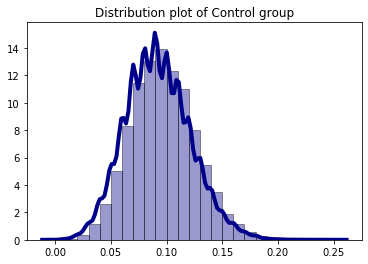

In [11]:
bins = 25
sns.distplot(cont_num_norm, hist=True, kde=True, 
             bins=bins, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Distribution plot of Control group')

Text(0.5, 1.0, 'Distribution plot of Campaign group')

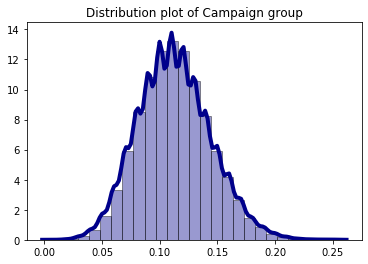

In [12]:
sns.distplot(camp_num_norm, hist=True, kde=True, 
             bins=bins, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Distribution plot of Campaign group')

Distributions plots seem to look like bell-curved plots.
Also it could be seen that the Campaign distribution plot is slightly moved to the right in comparison to the distribution plot of the Control group, which can implicate that conversion rate mean of the Campaign group is larger. 

#### Testing the assumption of equal variances in those two groups 

_HO_ - variances are euqal <br>
_H1_ - variances are not equal

alpha = 0.05

For this I will use Levene's test which is build in Scipy library.

In [13]:
L, pl = stats.levene(control_gp.y,campaign_gp.y)
print('Levene p-value:', pl)

Levene p-value: 2.2487646433862037e-11


As we can see p-value is lower than our threshold so the variances are not equal. Performing t-student test by it assumptions (homogeneity of variances) is not applicable. So we need to perform Welch's t-test which does not assume equal population variance.

We have two independent groups which are randomly chosen. 
So we want to compare if the difference in rates (people who subscribed to the terms) is significant. 

- _H0_ - null hypothesis that means of the two groups are equal
- _H1_ - alternative hypothesis that mean of second group (campaign group) is higher

alpha = 0.05

In [14]:
# ttest_ind, has attribution equal_val which switched to the FALSE performs Welch's test
sw, pw = stats.ttest_ind(control_gp.y,campaign_gp.y,equal_var=False) 
print("Welch's p_value:", pw)

Welch's p_value: 4.9462372927074655e-11


W alpha = 0.05, p-value is very small so we can reject the null hypothesis and accept the alternative hypothesis that mean is higher.

For further exploration and modeling, I'm choosing to take care only about the campaign group because I will be comparing results from this group to the Machine Learning outputs.

## Preparing dataset for visualization

In [15]:
#Checking for nulls
campaign_gp.isnull().sum()

age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
test_control_flag    0
dtype: int64

Now I am displaying info about campaign dataset structure to change Dtypes from object to categories variables for decreasing memory usage.

In [16]:
campaign_gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16476 entries, 1 to 16476
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                16476 non-null  int64  
 1   job                16476 non-null  object 
 2   marital            16476 non-null  object 
 3   education          16476 non-null  object 
 4   default            16476 non-null  object 
 5   housing            16476 non-null  object 
 6   loan               16476 non-null  object 
 7   contact            16476 non-null  object 
 8   month              16476 non-null  object 
 9   day_of_week        16476 non-null  object 
 10  duration           16476 non-null  float64
 11  campaign           16476 non-null  float64
 12  pdays              16476 non-null  int64  
 13  previous           16476 non-null  int64  
 14  poutcome           16476 non-null  object 
 15  emp.var.rate       16476 non-null  float64
 16  cons.price.idx     164

In [17]:
#Iterating through the names of the columns
obj_col = []
for col in campaign_gp.columns:
    if str(campaign_gp[col].dtype) == 'object':
        obj_col.append(col)
    else:
        continue
print(obj_col)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'test_control_flag']


In [18]:
#Changing the columns types to category
for col in obj_col:
    campaign_gp[col] = campaign_gp[col].astype('category')

In [19]:
campaign_gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16476 entries, 1 to 16476
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                16476 non-null  int64   
 1   job                16476 non-null  category
 2   marital            16476 non-null  category
 3   education          16476 non-null  category
 4   default            16476 non-null  category
 5   housing            16476 non-null  category
 6   loan               16476 non-null  category
 7   contact            16476 non-null  category
 8   month              16476 non-null  category
 9   day_of_week        16476 non-null  category
 10  duration           16476 non-null  float64 
 11  campaign           16476 non-null  float64 
 12  pdays              16476 non-null  int64   
 13  previous           16476 non-null  int64   
 14  poutcome           16476 non-null  category
 15  emp.var.rate       16476 non-null  float64 
 16  cons

Memory decreased from 2.9+ MB to 1.7 MB.

<Figure size 720x432 with 0 Axes>

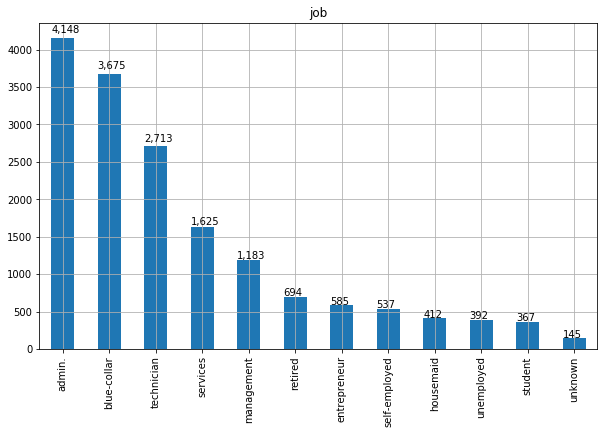

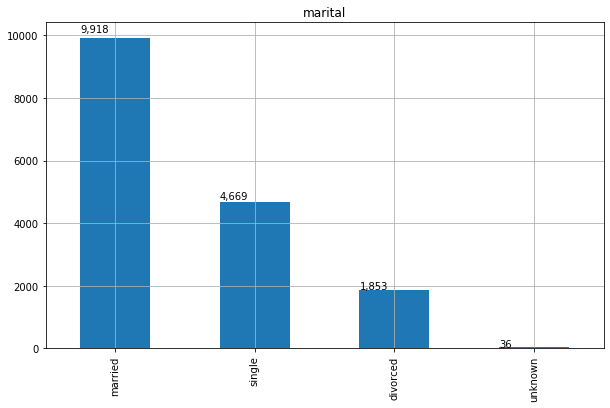

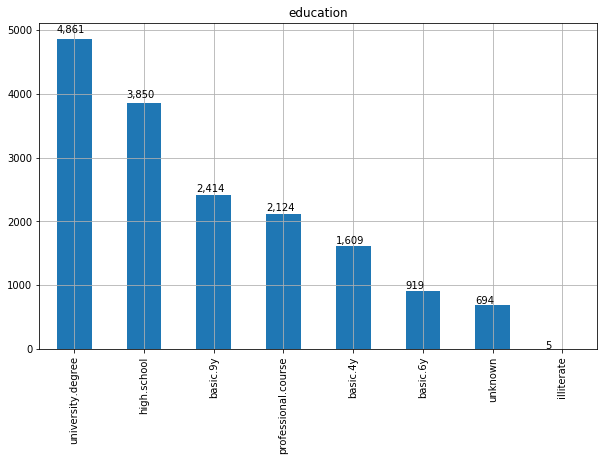

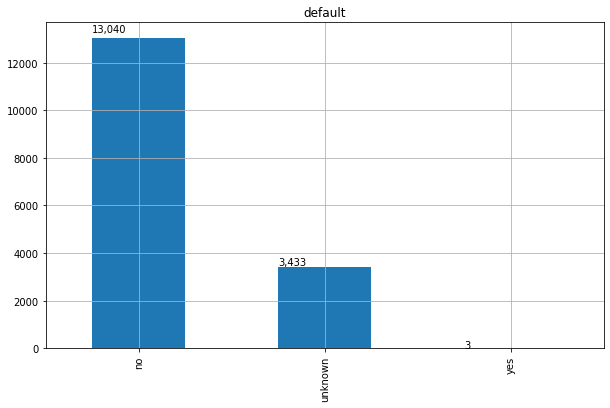

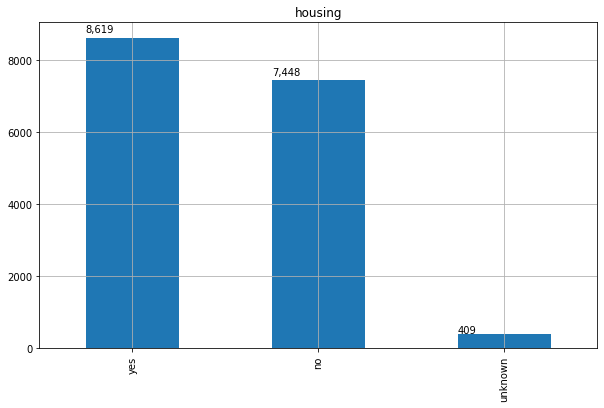

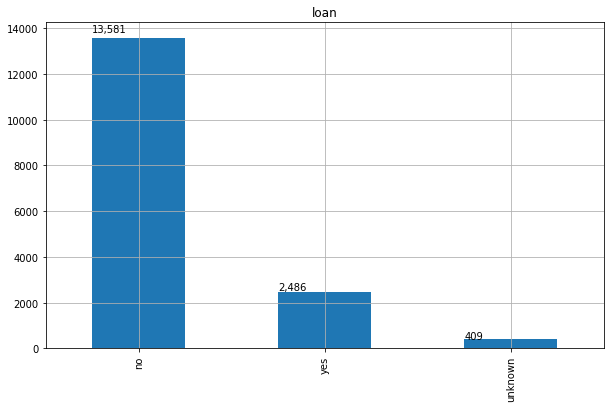

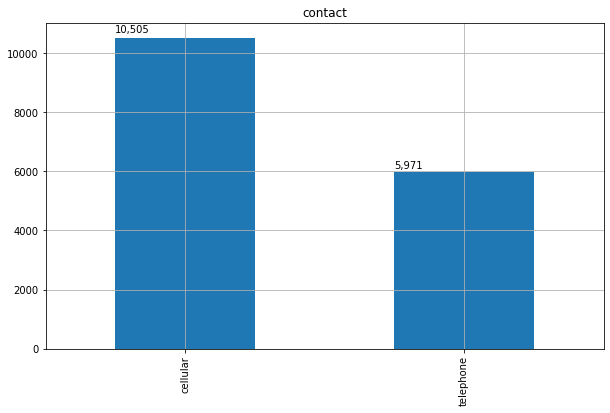

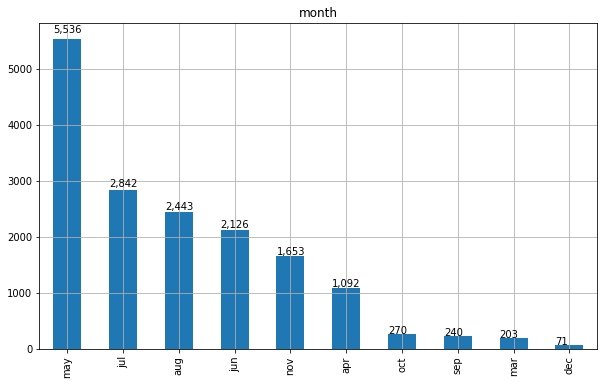

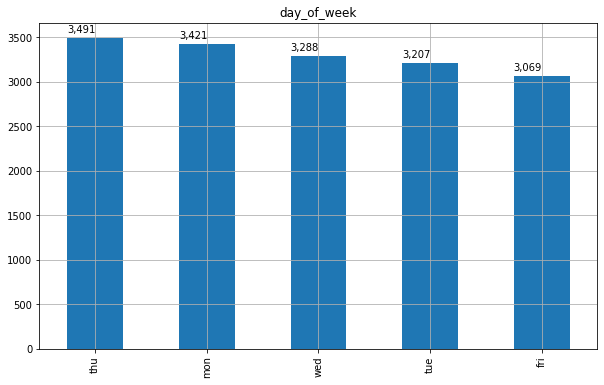

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

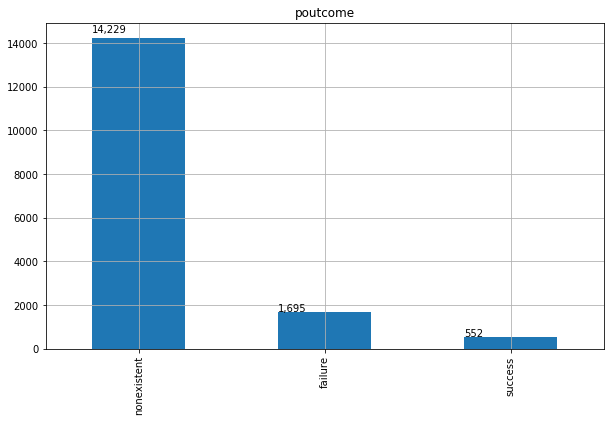

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [20]:
#Creating fast plots for categorical type to have a glimpse into the data, because Pairpolt from Seaborn is unreadable, with this dataset
for col in campaign_gp.columns:
    plt.figure(figsize=(10,6))
    if (str(campaign_gp[col].dtype) == 'category') & (col != 'test_control_flag'):
        ax = campaign_gp[col].value_counts().plot(kind='bar',title=col,grid=True)
        for p in ax.patches:
            ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.02))
        plt.show()
    else:
        continue

#### Assumptions for future calcultaions and plotting

Monthly cost of Call Center consultant = 4000 PLN <br>
https://interviewme.pl/blog/praca-w-call-center <br>
Mean of working hours per month = 167 <br>
https://inewi.pl/Blog/liczba-godzin-pracy-w-miesiacu-jak-wyliczyc-wymiar-czasu-pracy- <br>
Cost per minute = 0.4

In [21]:
#Changing seconds to minutes
campaign_gp.duration = campaign_gp.duration/60 

#Rounding up because consultant spends some on dialing number, making notes, breaks etc.
campaign_gp.duration = campaign_gp.duration.apply(np.ceil) 

cost_price = 0.4
income_price = 30 #Estimating income from subscription

#Calculating cost of the call and income per subscription
campaign_gp['call_cost'] = campaign_gp.duration * cost_price
campaign_gp['income'] = campaign_gp.y * income_price

In [22]:
#Calculting sum of costs and incomes
call_cost_sum = campaign_gp.call_cost.sum()
incom_sum = campaign_gp.income.sum()

#Calculating rate Return of Investment
ROI = (incom_sum-call_cost_sum)/call_cost_sum

print("Total cost:",f"{call_cost_sum:,}", 
      "\nTotal revenue:", f"{incom_sum:,}",
    "\nROI:",round(ROI,2)*100,"%")

Total cost: 31,814.4 
Total revenue: 55,680 
ROI: 75.0 %


## Plotting with estimated costs and revenue

##### Job

In [23]:
job_inc = campaign_gp.groupby('job').income.sum()
job_cost = campaign_gp.groupby('job').call_cost.sum()
job_rev = job_inc - job_cost
job_ROI = (job_inc - job_cost)/job_cost

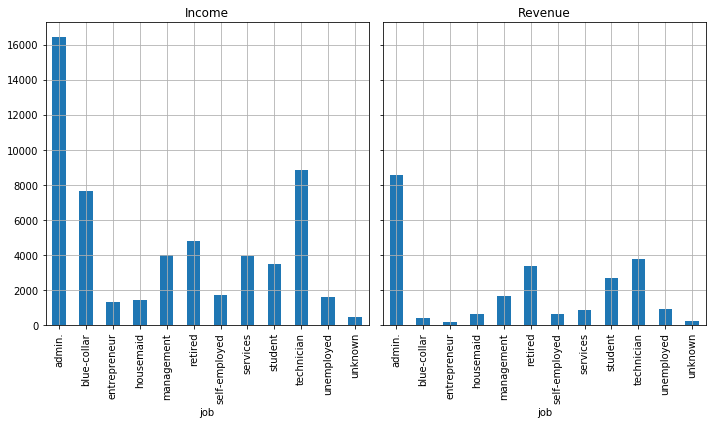

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey='row',figsize = (10,6))
job_inc.plot(ax=axes[0],kind='bar',title='Income',grid=True)
job_rev.plot(ax=axes[1],kind='bar',title='Revenue',grid=True)
plt.tight_layout();

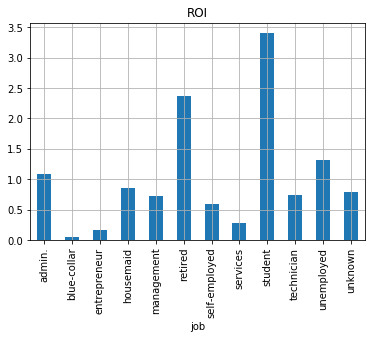

In [25]:
job_ROI.plot(kind='bar',title='ROI',grid=True);

As we can see on ROI graph, best target job groups are students and retired. Administration group generates the highest income but also requires a lot of effort.

##### Marital

In [26]:
mart_inc = campaign_gp.groupby('marital').income.sum()
mart_cost = campaign_gp.groupby('marital').call_cost.sum()
mart_rev = mart_inc - mart_cost
mart_ROI = (mart_inc - mart_cost)/mart_cost

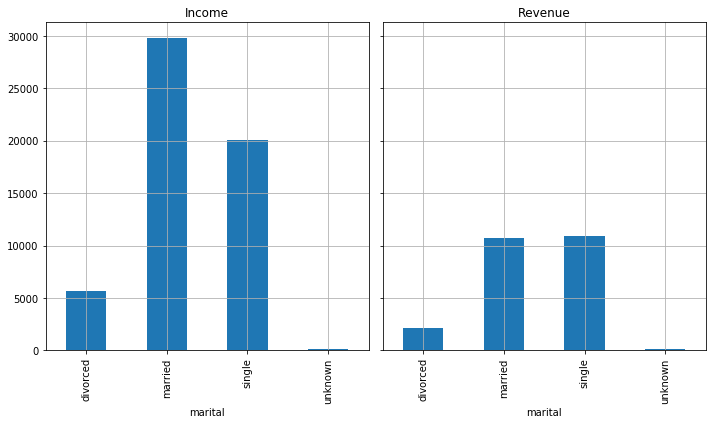

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey='row',figsize = (10,6))
mart_inc.plot(ax=axes[0],kind='bar',title='Income',grid=True)
mart_rev.plot(ax=axes[1],kind='bar',title='Revenue',grid=True)
plt.tight_layout();

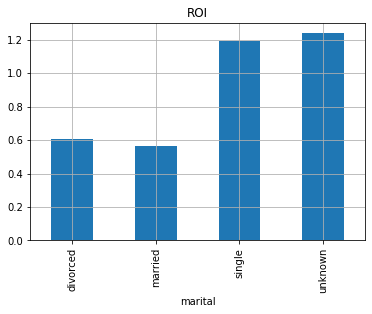

In [28]:
mart_ROI.plot(kind='bar',title='ROI',grid=True);

On the ROI graph, we can see that the unknown group is pretty impressive but its part overall is insignificant (Revenue graph).

##### Education

In [29]:
edu_inc = campaign_gp.groupby('education').income.sum()
edu_cost = campaign_gp.groupby('education').call_cost.sum()
edu_rev = edu_inc - edu_cost
edu_ROI = (edu_inc - edu_cost)/edu_cost

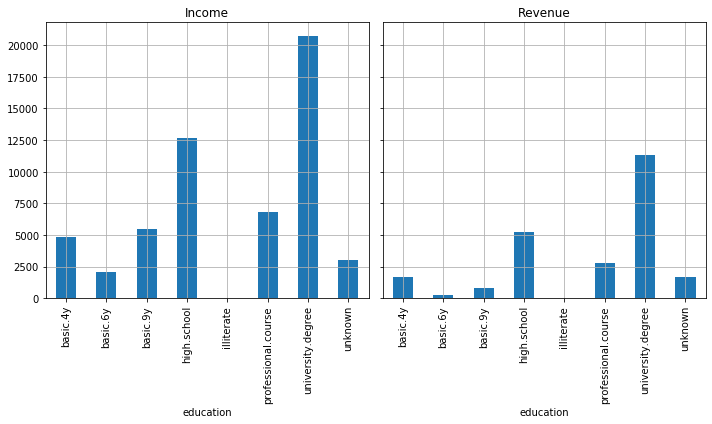

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey='row',figsize = (10,6))
edu_inc.plot(ax=axes[0],kind='bar',title='Income',grid=True)
edu_rev.plot(ax=axes[1],kind='bar',title='Revenue',grid=True)
plt.tight_layout();

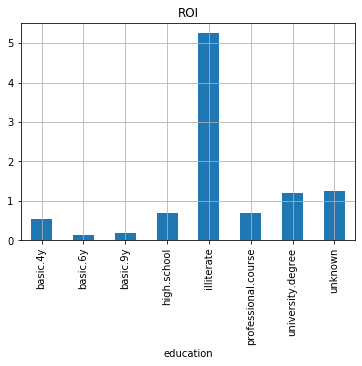

In [31]:
edu_ROI.plot(kind='bar',title='ROI',grid=True);

The illiterate group has a high ROI rate but its revenue is minor.

In [32]:
print("Illiterate Revenue:", edu_rev.loc['illiterate'])

Illiterate Revenue: 50.4


##### Default - credit

In [33]:
def_inc = campaign_gp.groupby('default').income.sum()
def_cost = campaign_gp.groupby('default').call_cost.sum()
def_rev = def_inc - def_cost
def_ROI = (def_inc - def_cost)/def_cost

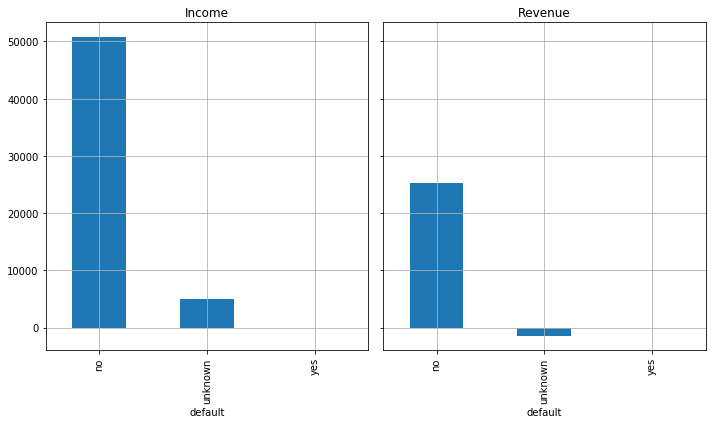

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey='row',figsize = (10,6))
def_inc.plot(ax=axes[0],kind='bar',title='Income',grid=True)
def_rev.plot(ax=axes[1],kind='bar',title='Revenue',grid=True)
plt.tight_layout();

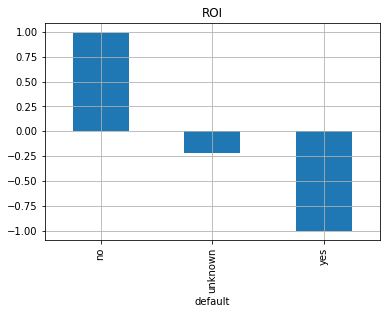

In [36]:
def_ROI.plot(kind='bar',title='ROI',grid=True);

According to this plots, only clients with credit are profitable.

##### Housing - loan

In [37]:
hou_inc = campaign_gp.groupby('housing').income.sum()
hou_cost = campaign_gp.groupby('housing').call_cost.sum()
hou_rev = hou_inc - hou_cost
hou_ROI = (hou_inc - hou_cost)/hou_cost

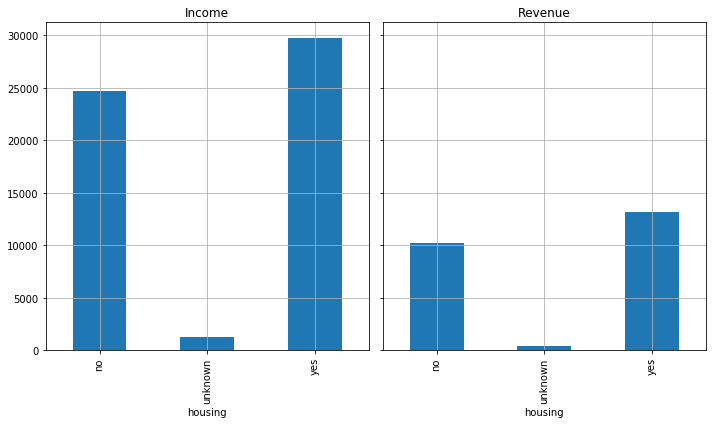

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey='row',figsize = (10,6))
hou_inc.plot(ax=axes[0],kind='bar',title='Income',grid=True)
hou_rev.plot(ax=axes[1],kind='bar',title='Revenue',grid=True)
plt.tight_layout();

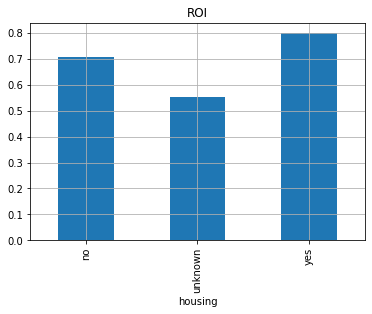

In [39]:
hou_ROI.plot(kind='bar',title='ROI',grid=True);

For clients with or without housing loan, there is no significant difference.

##### Loan

In [40]:
loan_inc = campaign_gp.groupby('loan').income.sum()
loan_cost = campaign_gp.groupby('loan').call_cost.sum()
loan_rev = loan_inc - loan_cost
loan_ROI = (loan_inc - loan_cost)/loan_cost

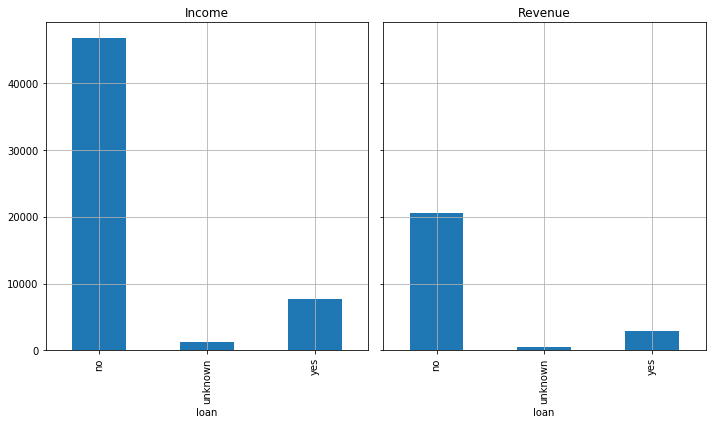

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey='row',figsize = (10,6))
loan_inc.plot(ax=axes[0],kind='bar',title='Income',grid=True)
loan_rev.plot(ax=axes[1],kind='bar',title='Revenue',grid=True)
plt.tight_layout();

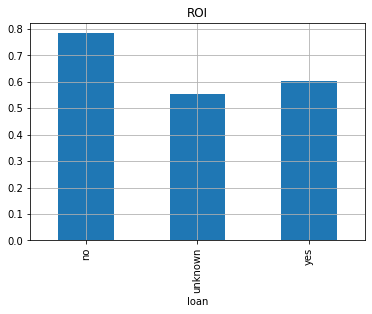

In [42]:
loan_ROI.plot(kind='bar',title='ROI',grid=True);

As well as Housing loan groups are similar.

##### Age

In [43]:
bins = list(range(0,91,10))

In [44]:
age_inc = campaign_gp.groupby(pd.cut(campaign_gp.age,bins)).income.sum()
age_cost = campaign_gp.groupby(pd.cut(campaign_gp.age,bins)).call_cost.sum()
age_rev = age_inc - age_cost
age_ROI = (age_inc - age_cost)/age_cost

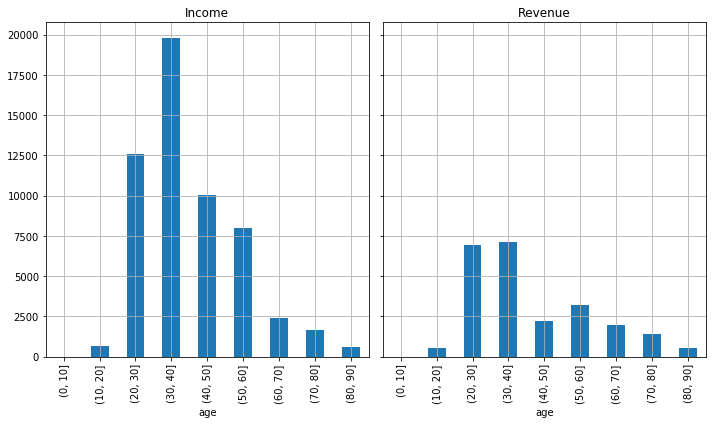

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey='row',figsize = (10,6))
age_inc.plot(ax=axes[0],kind='bar',title='Income',grid=True)
age_rev.plot(ax=axes[1],kind='bar',title='Revenue',grid=True)
plt.tight_layout();

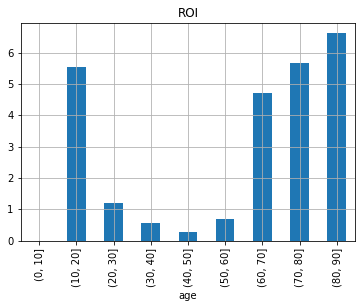

In [46]:
age_ROI.plot(kind='bar',title='ROI',grid=True);

This Age split shows inverse relationship. Those with relatively low income generated, have the highest ROI rate. So those are focuse groups. 

## Modeling

Dropping columns related to the campaign, to the day of subscription to rid of any values which are generated after subscription. Those values can skew our prediction model. Dropping also columns with calculations and test_control_flag. 

In [47]:
campaign_gp.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign', 
                  'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed',
                 'test_control_flag', 'call_cost', 'income'],axis=1,inplace=True)

As shown on the plots above, the dataset contains a lot of unknown values so it's time to deal with them. I didn't take care of them earlier because I wanted to see if they have any significant meaning and they don't with estimated revenue.

In [48]:
campaign_gp.isin(['unknown']).sum()

age             0
job           145
marital        36
education     694
default      3433
housing       409
loan          409
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

In [49]:
#Switching unknown values to NaN to have easy access by python function fillna. 
campaign_gp.replace('unknown',np.NaN,inplace=True)

In [50]:
#Filling nan values with modes.
campaign_gp.fillna(campaign_gp.mode().iloc[0],inplace=True)

In [51]:
campaign_gp.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Displaying correlatoins

In [52]:
#Getting a list of columns with category type
obj_col2 = []
for col in campaign_gp.columns:
    if str(campaign_gp[col].dtype) == 'category':
        obj_col2.append(col)
    else:
        continue
print(obj_col2)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']


In [53]:
#Changing category data to numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
campaign_gp[obj_col2] = campaign_gp[obj_col2].apply(le.fit_transform)

In [54]:
campaign_gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16476 entries, 1 to 16476
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        16476 non-null  int64
 1   job        16476 non-null  int32
 2   marital    16476 non-null  int32
 3   education  16476 non-null  int32
 4   default    16476 non-null  int32
 5   housing    16476 non-null  int32
 6   loan       16476 non-null  int32
 7   pdays      16476 non-null  int64
 8   previous   16476 non-null  int64
 9   poutcome   16476 non-null  int32
 10  y          16476 non-null  int64
dtypes: int32(7), int64(4)
memory usage: 1.1 MB


In [55]:
#Applying correlation function to see if any features are correlated to avoid multicollinearity 
corr = campaign_gp.corr()

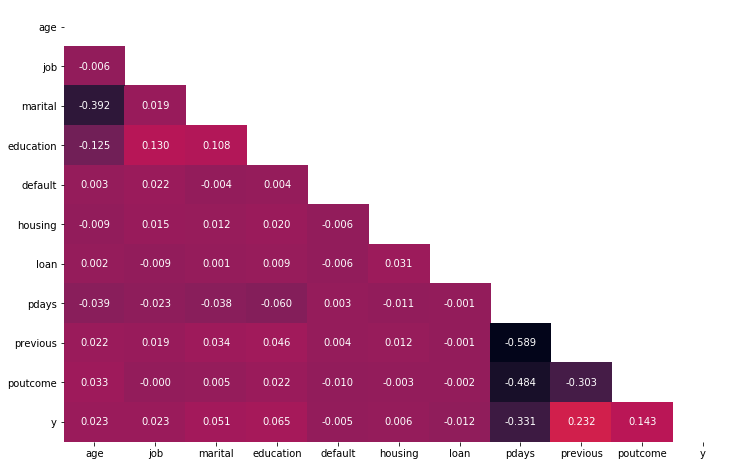

In [56]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(12,8))
sns.heatmap(corr, mask=mask,annot=True, fmt='.3f',cbar=False)

#### Making dummy variables 

In [57]:
#Making and dropping first column for given feature from which we are creating dummies to avoid multicollinearity.
campaign_gp = pd.get_dummies(data=campaign_gp, columns=obj_col2,drop_first=True)

In [58]:
campaign_gp.columns

Index(['age', 'pdays', 'previous', 'y', 'job_1', 'job_2', 'job_3', 'job_4',
       'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'marital_1',
       'marital_2', 'education_1', 'education_2', 'education_3', 'education_4',
       'education_5', 'education_6', 'default_1', 'housing_1', 'loan_1',
       'poutcome_1', 'poutcome_2'],
      dtype='object')

In [59]:
from sklearn.preprocessing import MinMaxScaler

#Scaling numerical data to speed up a computation process
scaler = MinMaxScaler()
to_scale = ['age','pdays','previous']

campaign_gp[to_scale] = scaler.fit_transform(campaign_gp[to_scale])

In [60]:
for col in to_scale:
    print(str(col),"\n",campaign_gp[col].value_counts(),"\n")

age 
 0.186667    759
0.200000    750
0.213333    735
0.240000    723
0.253333    714
           ... 
0.920000      3
0.893333      3
1.000000      2
0.000000      2
0.960000      1
Name: age, Length: 73, dtype: int64 

pdays 
 1.000000    15873
0.003003      188
0.006006      164
0.004004       43
0.009009       26
0.002002       26
0.007007       23
0.010010       17
0.012012       17
0.005005       16
0.001001       14
0.013013       12
0.011011        9
0.014014        8
0.015015        8
0.008008        7
0.000000        6
0.017017        5
0.019019        3
0.016016        3
0.018018        2
0.022022        2
0.026026        1
0.027027        1
0.025025        1
0.020020        1
Name: pdays, dtype: int64 

previous 
 0.000000    14229
0.166667     1819
0.333333      306
0.500000       85
0.666667       26
0.833333        9
1.000000        2
Name: previous, dtype: int64 



#### Creating dataset with Smote

As we can saw at the beginning we are dealing with the imbalanced dataset, bearly 3 to 22 (subscribed to not subscribed). So I decided to use SMOTE ( _Synthetic Minority Oversampling Technique_) library to add samples to the dataset to balance y category.

In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

Using TensorFlow backend.


In [62]:
#Splitting dataset to variables (independent variable - X) and target (dependent variable - y)
X = campaign_gp.drop('y',axis=1)
y = campaign_gp.y

print("Y structure before oversampling:", 
      "\nlables 1:",sum(y == 1), 
      '\nlables 0:', sum(y == 0))

Y structure before oversampling: 
lables 1: 1856 
lables 0: 14620


In [63]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y.ravel())

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

print("Y structe after oversampling:", 
      "\nlables 1:", Counter(y_res)[1], 
      '\nlables 0:', Counter(y_res)[0])

Y structe after oversampling: 
lables 1: 14620 
lables 0: 14620


In [64]:
#Checking which model will the best
names = ["Logistic regression",
        "SVM Linear",
        "SGD Classifier",
        "K-nearest Neighbors",
        "Decision Tree", 
        "Random Forest",
        "XGBoost"
        ]

classifiers = [LogisticRegression(),
        SVC(kernel = 'linear'),
        SGDClassifier(max_iter = 100),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        XGBClassifier()    
        ]

models = zip(names, classifiers)
Mods = []
AUCS = []

for name, model in models:
    model.fit(X_train,y_train)
    accuracy = model.score(X_test, y_test)*100
    pred = model.predict(X_test)
    score = roc_auc_score(y_test,pred)*100
    Mods.append(accuracy)
    AUCS.append(score)
    print("{} Accuracy: {}".format(name, accuracy),
         "\n{} Roc_auc_score: {}".format(name, score),"\n")

Logistic regression Accuracy: 64.27838577291382 
Logistic regression Roc_auc_score: 64.02990682428292 

SVM Linear Accuracy: 63.252393980848154 
SVM Linear Roc_auc_score: 63.15296302994018 

SGD Classifier Accuracy: 63.252393980848154 
SGD Classifier Roc_auc_score: 63.15296302994018 

K-nearest Neighbors Accuracy: 74.72640218878249 
K-nearest Neighbors Roc_auc_score: 74.69314516766187 

Decision Tree Accuracy: 87.96169630642954 
Decision Tree Roc_auc_score: 87.93440888344227 

Random Forest Accuracy: 82.14774281805745 
Random Forest Roc_auc_score: 82.06535116904186 

XGBoost Accuracy: 76.8467852257182 
XGBoost Roc_auc_score: 76.45352889641114 



In [65]:
#Sorting outcomes in more convenient way
d = {"Model":names,'Accuracy':Mods,'ROC_AUC_score':AUCS}
df = pd.DataFrame(d)
df.sort_values('ROC_AUC_score',ascending=False)

,Model,Accuracy,ROC_AUC_score
4,Decision Tree,87.961696,87.934409
5,Random Forest,82.147743,82.065351
6,XGBoost,76.846785,76.453529
3,K-nearest Neighbors,74.726402,74.693145
0,Logistic regression,64.278386,64.029907
1,SVM Linear,63.252394,63.152963
2,SGD Classifier,63.252394,63.152963


In [66]:
#Creating an ensemble model to see if there will be any increase in ROC_AUC_score
clf1 = XGBClassifier()
clf2 = RandomForestClassifier()
clf3 = DecisionTreeClassifier()

ensemble = VotingClassifier(estimators = [('XGB',clf1), ('RND',clf2), ('DEC',clf3)], 
                            voting = 'hard', n_jobs = -1)
ensemble.fit(X_train,y_train)

accuracy_ens = ensemble.score(X_test, y_test)*100
pred_ens = ensemble.predict(X_test)
score_ens = roc_auc_score(y_test,pred_ens)*100

print("Voting Classifier: Accuracy:", accuracy_ens)
print("Voting Classifier: Score:", score_ens)

Voting Classifier: Accuracy: 86.08071135430917
Voting Classifier: Score: 85.95958230404628


## Decision Tree & Grid Search

Creating Grid Search to see if there will be any improvement

In [67]:
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

decision = DecisionTreeClassifier()

grid = GridSearchCV(decision, 
                     hyperF,
                     scoring='roc_auc',
                     cv = 5, 
                     verbose = 2, 
                     n_jobs = -1,
                     )
grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                      

In [68]:
accuracy_grid = grid.score(X_test, y_test)*100
pred_grid=grid.predict(X_test)
score_grid = roc_auc_score(y_test,pred_grid)*100
print("Grid Search Accuracy:", accuracy_grid)
print("Grid Search Score:", score_grid)

Grid Search Accuracy: 91.2010368073637
Grid Search Score: 83.31410827017154


## Decision Tree alone

So if there is any improvement I will use Decision Tree Algorithm with default settings.

In [69]:
dec = DecisionTreeClassifier()
model_dec = dec.fit(X_train,y_train)
preds = model_dec.predict(X_test)

In [70]:
#buillding funcion for generating ROC plot
def buildROC(target_test,test_preds):
    fpr, tpr, threshold = metrics.roc_curve(target_test, test_preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

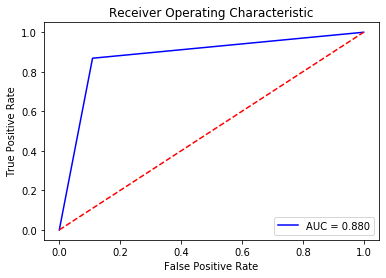

In [71]:
buildROC(y_test,preds)

In [72]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      3003
           1       0.88      0.87      0.88      2845

    accuracy                           0.88      5848
   macro avg       0.88      0.88      0.88      5848
weighted avg       0.88      0.88      0.88      5848



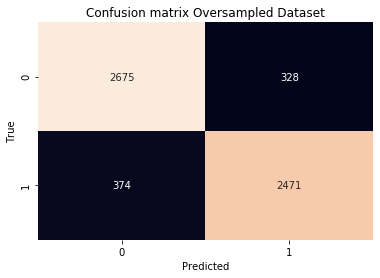

In [73]:
cm = confusion_matrix(y_test,preds)

ax = sns.heatmap(cm,annot=True,fmt='.0f',cbar=False)
plt.title("Confusion matrix Oversampled Dataset")
plt.xlabel('Predicted')
plt.ylabel('True');

As we can see the model on oversampled data performs very well:
- 378 cases were classified that will not subscribe which will subscribe
- 333 cases were classified that will subscribe which will not subscribe

In [74]:
#Calculating average cost from campaign group for further calculations
avg_cost = call_cost_sum/len(X)
print("Average cost per call",round(avg_cost,2))

Average cost per call 1.93


In [75]:
fals_pos = cm[0][1]
true_pos = cm[1][1]

sum_pos = fals_pos + true_pos
costs_pos = sum_pos*avg_cost
incom_pos = true_pos*income_price

reve_pos = incom_pos - costs_pos

ROI = (incom_pos - costs_pos)/costs_pos

In [76]:
print("Total costs", f"{round(costs_pos,2):,}"
    "\nTotal revenue:", f"{round(reve_pos,2):,}",
    "\nROI:",f"{round(ROI*100,2):,}","%")

Total costs 5,404.74
Total revenue: 68,725.26 
ROI: 1,271.57 %


### Other approch

Preparing dataset where only training data will be oversampled, training data will be unbalanced to see if algorithms will be able to predict in a reasonable way. Rest steps are the same as previously.

In [77]:
X = campaign_gp.drop('y',axis=1)
y = campaign_gp.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Shapes before oversampling:", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

print("\nY structure in train set before oversampling:", 
      "\nlables 1:",sum(y_train == 1), 
      '\nlables 0:', sum(y_train == 0))

Shapes before oversampling: (13180, 26) (13180,) (3296, 26) (3296,)

Y structure in train set before oversampling: 
lables 1: 1499 
lables 0: 11681


In [78]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print("Shapes after oversampling:",X_train_res.shape, y_train_res.shape, X_test.shape, y_test.shape)

print("\nY structure in train set after oversampling:", 
      "\nlables 1:",sum(y_train_res == 1), 
      '\nlables 0:', sum(y_train_res == 0))

Shapes after oversampling: (23362, 26) (23362,) (3296, 26) (3296,)

Y structure in train set after oversampling: 
lables 1: 11681 
lables 0: 11681


In [79]:
names = ["Logistic regression",
        "SVM Linear",
        "SGD Classifier",
        "K-nearest Neighbors",
        "Decision Tree", 
        "Random Forest",
        "XGBoost"
        ]

classifiers = [LogisticRegression(),
        SVC(kernel = 'linear'),
        SGDClassifier(max_iter = 100),
        KNeighborsClassifier(), #Adding K-n for curiosty but from the last plot above in my opinion this classifier will has the more struggles than the rest
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        XGBClassifier()    
        ]

models = zip(names, classifiers)
Mods = []
AUCS = []

for name, model in models:
    model.fit(X_train_res,y_train_res)
    accuracy = model.score(X_test, y_test)*100
    pred = model.predict(X_test)
    score = roc_auc_score(y_test,pred)*100
    Mods.append(accuracy)
    AUCS.append(score)
    print("{} Accuracy: {}".format(name, accuracy),
         "\n{} Roc_auc_score: {}".format(name, score),"\n")

Logistic regression Accuracy: 69.9635922330097 
Logistic regression Roc_auc_score: 62.732326683650655 

SVM Linear Accuracy: 66.01941747572816 
SVM Linear Roc_auc_score: 62.489385002044386 

SGD Classifier Accuracy: 66.01941747572816 
SGD Classifier Roc_auc_score: 62.489385002044386 

K-nearest Neighbors Accuracy: 76.97208737864078 
K-nearest Neighbors Roc_auc_score: 59.525715696281914 

Decision Tree Accuracy: 83.82888349514563 
Decision Tree Roc_auc_score: 58.571866991097224 

Random Forest Accuracy: 81.58373786407766 
Random Forest Roc_auc_score: 60.758151508306625 

XGBoost Accuracy: 85.31553398058253 
XGBoost Roc_auc_score: 63.58896059274338 



In [80]:
d = {"Model":names,'Accuracy':Mods,'ROC_AUC_score':AUCS}
df = pd.DataFrame(d)
df.sort_values('ROC_AUC_score',ascending=False)

,Model,Accuracy,ROC_AUC_score
6,XGBoost,85.315534,63.588961
0,Logistic regression,69.963592,62.732327
1,SVM Linear,66.019417,62.489385
2,SGD Classifier,66.019417,62.489385
5,Random Forest,81.583738,60.758152
3,K-nearest Neighbors,76.972087,59.525716
4,Decision Tree,83.828883,58.571867


In [81]:
clf1 = XGBClassifier()
clf2 = KNeighborsClassifier()
clf3 = SVC(kernel='linear')

ensemble = VotingClassifier(estimators = [('XGB',clf1), ('KNN',clf2), ('SVMC',clf3)], 
                            voting = 'hard', n_jobs = -1)
ensemble.fit(X_train_res,y_train_res)

accuracy_ens = ensemble.score(X_test, y_test)*100
pred_ens = ensemble.predict(X_test)
score_ens = roc_auc_score(y_test,pred_ens)*100

print("Voting Classifier: Accuracy:", accuracy_ens)
print("Voting Classifier: Score:", score_ens)

Voting Classifier: Accuracy: 81.58373786407766
Voting Classifier: Score: 62.603803004699664


In [82]:
xgb = XGBClassifier()
model_xgb = xgb.fit(X_train_res,y_train_res)
pred_xgb = model_xgb.predict(X_test)

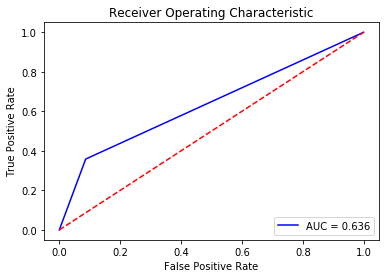

In [83]:
buildROC(y_test,pred_xgb)

In [84]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2939
           1       0.33      0.36      0.35       357

    accuracy                           0.85      3296
   macro avg       0.63      0.64      0.63      3296
weighted avg       0.86      0.85      0.86      3296



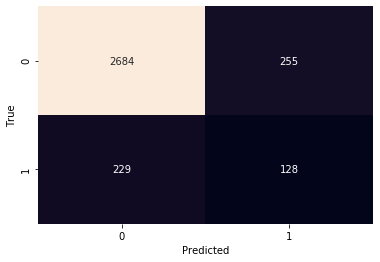

In [85]:
cm2 = confusion_matrix(y_test,pred_xgb)

ax = sns.heatmap(cm2,annot=True,fmt='.0f',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True');

As we can see model on oversampled data performs very well:
- 229 cases were classified that will not subscribe which will subscribe
- 255 cases were classified that will subscribe which will not subscribe

In [86]:
fals_pos = cm2[0][1]
true_pos = cm2[1][1]

sum_pos = fals_pos + true_pos
costs_pos = sum_pos*avg_cost
incom_pos = true_pos*income_price

reve_pos = incom_pos - costs_pos

ROI2 = (incom_pos - costs_pos)/costs_pos

print("Total costs", f"{round(costs_pos,2):,}"
    "\nTotal revenue:", f"{round(reve_pos,2):,}",
    "\nROI:",f"{round(ROI2*100,2):,}","%")

Total costs 739.56
Total revenue: 3,100.44 
ROI: 419.23 %


As we can see there are potential benefits for applying Machine Learning to improve targeting people. The algorithm is slightly better than random choosing by 13%, is able to predict with high confidence to which person we should not call which will help to reduce costs of marketing campaigns.
And there is space to improve by gathering a more balanced dataset. The accuracy can rise even by up to 88%. 